In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None)

## Importing dataset

In [15]:
df = pd.read_csv ('dataset.csv')
df

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


## Categorial Variables 

In [16]:
# Get the counts of each category
continents = df['continent']
continent_counts = continents.value_counts()
continent_counts

Africa                     54
Asia                       53
Europe                     50
North America              38
Oceania                    24
South America              13
Seven seas (open ocean)     8
Antarctica                  1
Name: continent, dtype: int64

### Adding "others" categoric

In [19]:
# Create a mask for only categories that occur less than 10 times
mask = continents.isin(continent_counts[continent_counts < 15].index)

# Label all other categories as Other
continents[mask] = 'Other'

# Print the updated category counts
print(pd.value_counts(continents))

Africa           54
Asia             53
Europe           50
North America    38
Oceania          24
Other            22
Name: continent, dtype: int64


## Discretization

In [20]:
# Specify the boundaries of the bins
bins_lat = [-np.inf, 0, np.inf]
# Bin labels
labels_lat = ['Sul', 'Norte']

# Specify the boundaries of the bins
bins_lng = [-np.inf, 0, np.inf]
# Bin labels
labels_lng = ['Oeste', 'Leste']

# Bin the continuous variable ConvertedSalary using these boundaries
df['Lat'] = pd.cut(df['Latitude'], bins=bins_lat, labels=labels_lat)
df['Lng'] = pd.cut(df['Longitude'], bins=bins_lng, labels=labels_lng)

df

,name,Longitude,Latitude,continent,Lat,Lng
0,Aruba,-69.982677,12.520880,North America,Norte,Oeste
1,Afghanistan,66.004734,33.835231,Asia,Norte,Leste
2,Angola,17.537368,-12.293361,Africa,Sul,Leste
3,Anguilla,-63.064989,18.223959,North America,Norte,Oeste
4,Albania,20.049834,41.142450,Europe,Norte,Leste
...,...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania,Sul,Oeste
237,Yemen,47.586762,15.909280,Asia,Norte,Leste
238,South Africa,25.083901,-29.000341,Africa,Sul,Leste
239,Zambia,27.774759,-13.458242,Africa,Sul,Leste


### Encoding
#### Hot Encondig

In [ ]:
# Concatenate train and test together
houses = pd.concat([train, test])

# Label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Create new features
houses['RoofStyle_enc'] = le.fit_transform(houses['RoofStyle'])
houses['CentralAir_enc'] = le.fit_transform(houses['CentralAir'])

# Look at new features
print(houses[['RoofStyle', 'RoofStyle_enc', 'CentralAir', 'CentralAir_enc']].head())

In [ ]:
# Concatenate train and test together
houses = pd.concat([train, test])

# Label encode binary 'CentralAir' feature
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
houses['CentralAir_enc'] = le.fit_transform(houses['CentralAir'])

# Create One-Hot encoded features
ohe = pd.get_dummies(houses['RoofStyle'], prefix='RoofStyle')

# Concatenate OHE features to houses
houses = pd.concat([houses, ohe], axis=1)

# Look at OHE features
print(houses[[col for col in houses.columns if 'RoofStyle' in col]].head(3))

## Removing outliers

<AxesSubplot:>

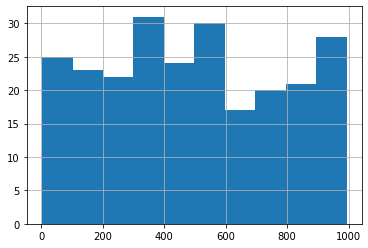

In [30]:
#New numeric column
df['Numeric'] = np.random.randint(0,1000,size=(241, 1))
df['Numeric'].hist()

### Quantile

Qualtile is  940.0


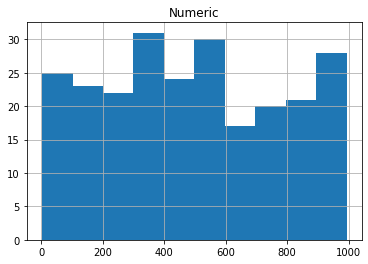

(241, 7)


<Figure size 432x288 with 0 Axes>

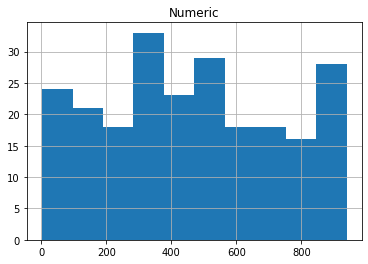

(228, 7)


In [38]:
# QUARTIS (95% - REMOVER 5%)
# Find the 95th quantile
quantile = df['Numeric'].quantile(0.95)
print('Qualtile is ',quantile)

# Trim the outliers
trimmed_df = df[df['Numeric'] < quantile]

# The original histogram
df[['Numeric']].hist()
plt.show()
plt.clf()
print(df.shape)

# The trimmed histogram
trimmed_df[['Numeric']].hist()
plt.show()
print(trimmed_df.shape)


### 3rd DEGREE OF STANDARD DEVIATION ABOUT THE AVERAGE

The cut_off is  460.2265421833184
29.246486862324787 949.6995712289615


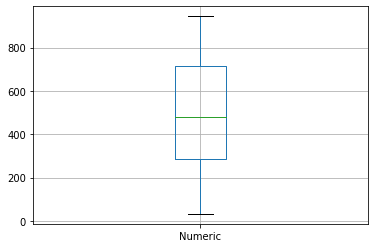

(241, 7)
(223, 7)


In [52]:
# Find the mean and standard dev
std = df['Numeric'].std()
mean = df['Numeric'].mean()

# Calculate the cutoff  (3)
cut_off = std * 1.6
lower, upper = mean - cut_off, mean+cut_off
print('The cut_off is ',cut_off)
print(lower,upper)

# Trim the outliers
trimmed_df = df[(df['Numeric'] < upper) & (df['Numeric'] > lower)]

# The trimmed box plot
trimmed_df[['Numeric']].boxplot()
plt.show()
print(df.shape)
print(trimmed_df.shape)
# OBS: PARA NORMALIZAÇÃO E REMOÇÃO DE OUTLIERS SEMPRE TREINAR (FIT) NA BASE DE TREINO E TRANSFORMAR A BASE DE TESTE ANTES DE VALIDAR



In [ ]:
# Datetime
taxi = pd.concat([train, test])

# Convert pickup date to datetime object
taxi['pickup_datetime'] = pd.to_datetime(taxi['pickup_datetime'])

# Create a day of week feature
taxi['dayofweek'] = taxi['pickup_datetime'].dt.dayofweek

# Create an hour feature
taxi['hour'] = taxi['pickup_datetime'].dt.hour

# Split back into train and test
new_train = taxi[taxi['id'].isin(train['id'])]
new_test = taxi[taxi['id'].isin(test['id'])]